# Decision Tree Classifier on Car Purchase Dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cars-purchase-decision-dataset/car_data.csv


In [ ]:
import pandas as pd 

In [ ]:
link = "/kaggle/input/cars-purchase-decision-dataset/car_data.csv" 

In [ ]:
df = pd.read_csv(link) 
df.head() 

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df.describe(include="all")  

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


In [ ]:
df["male"] = df["Gender"] == "Male" 
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased,male
0,385,Male,35,20000,0,True
1,681,Male,40,43500,0,True
2,353,Male,49,74000,0,True
3,895,Male,40,107500,1,True
4,661,Male,25,79000,0,True


In [ ]:
df.drop("Gender", axis=1, inplace=True) 
df.head() 

,User ID,Age,AnnualSalary,Purchased,male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True


In [ ]:
df.Purchased.value_counts() 

0    598
1    402
Name: Purchased, dtype: int64

In [ ]:
X = df[["Age", "AnnualSalary", "male"]].values
y = df["Purchased"].values

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [3,5,7,10,15,20],
    "min_samples_leaf": [1,3],
    "max_leaf_nodes": [10,20,35,50]
    }

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion="entropy")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [ ]:
gs = GridSearchCV(modelo, param_grid, scoring="f1", cv=5) 
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}


In [ ]:
print(gs.best_score_) 

0.883600746632329


In [ ]:
finalmodel = DecisionTreeClassifier(
    criterion="entropy",
    max_depth= gs.best_params_["max_depth"],
    min_samples_leaf= gs.best_params_["min_samples_leaf"],
    max_leaf_nodes = gs.best_params_["max_leaf_nodes"]
    )
finalmodel.fit(X_train, y_train)
y_pred = finalmodel.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_score(y_test,y_pred)

0.8842975206611571

In [ ]:
ps = precision_score(y_test, y_pred) 

In [ ]:
from sklearn.metrics import confusion_matrix
cmx = confusion_matrix(y_test, y_pred) 
cmx 

array([[165,  14],
       [ 14, 107]])

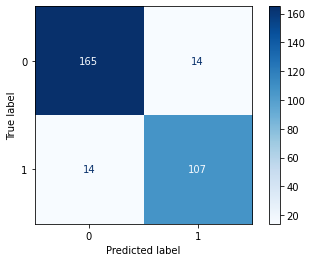

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(finalmodel, X_test, y_test, cmap=plt.cm.Blues)
plt.show() 

In [ ]:
recall_score(y_test, y_pred) 

0.8842975206611571

In [ ]:
f1_score(y_test, y_pred) 

0.8842975206611571

In [ ]:
accuracy_score(y_test, y_pred) 

0.9066666666666666

In [ ]:
print("-----------------------")
print(" \n " ) 
print("Conclusión") 
print("") 
print( "El modelo tiene una precisión del", int((ps*100).round(0)), "%. Acertando al predecir correctamente", cmx[1][1], "valores positivos, y", cmx[0][0], "valores negativos. Solo fallando en", cmx[0][1]+cmx[1][0], "valores.")  
print(" \n ")
print("-----------------------") 

-----------------------
 
 
Conclusión

El modelo tiene una precisión del 88 %. Acertando al predecir correctamente 107 valores positivos, y 165 valores negativos. Solo fallando en 28 valores.
 
 
-----------------------


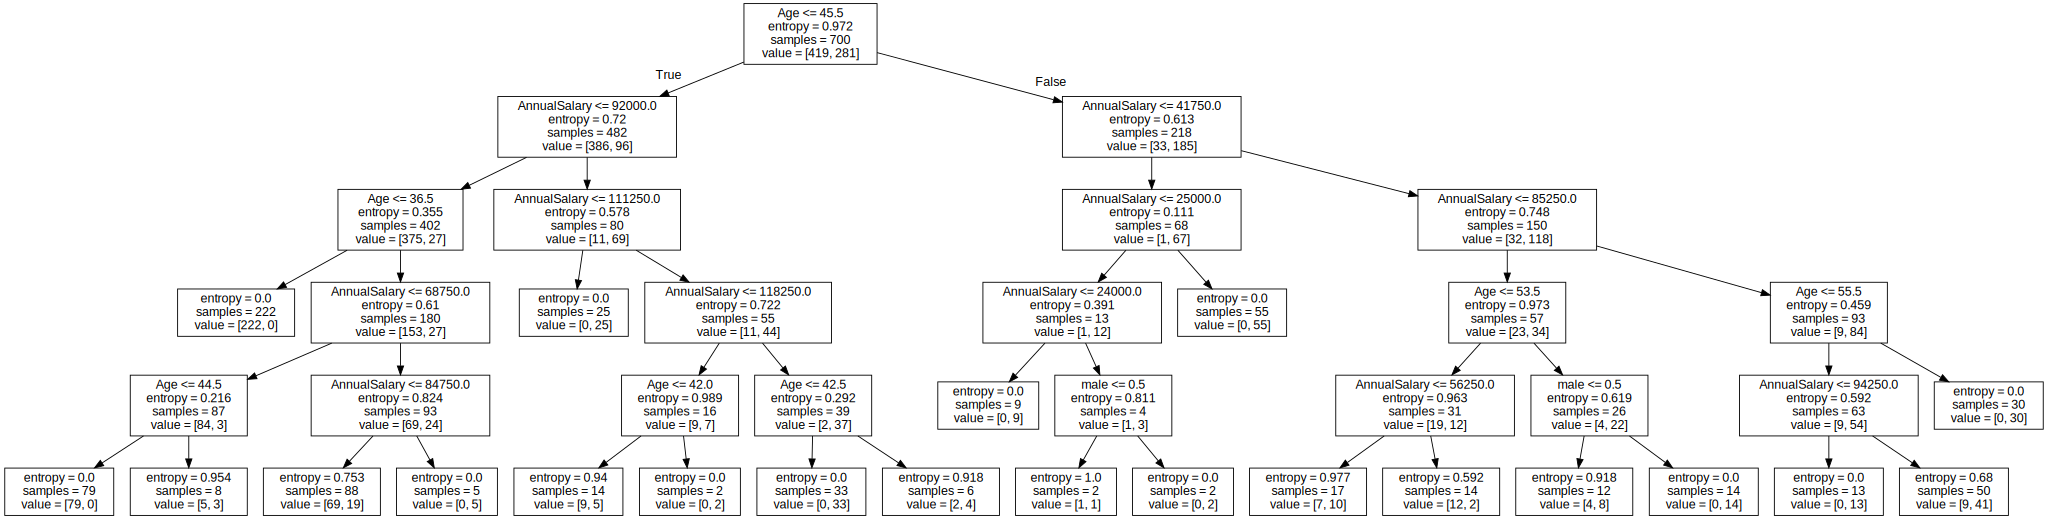

In [ ]:
import graphviz
from IPython.display import Image 
from sklearn.tree import export_graphviz 

dot_file = export_graphviz(finalmodel, feature_names=["Age","AnnualSalary","male"])
graph = graphviz.Source(dot_file)
graph.render(filename="tree", cleanup=True ) 
graph 